### Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading the dataset

In [2]:
df = pd.read_csv(r"F:\Python_Files\Dataset_for_practices\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv", encoding = "unicode_escape")
# to avoid encoding error, using encoding = "unicode_escape"

In [3]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


### Basic info of dataset

In [4]:
df.shape
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  11251
Number of columns:  15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

User_ID               0.000000
Cust_name             0.000000
Product_ID            0.000000
Gender                0.000000
Age Group             0.000000
Age                   0.000000
Marital_Status        0.000000
State                 0.000000
Zone                  0.000000
Occupation            0.000000
Product_Category      0.000000
Orders                0.000000
Amount                0.106657
Status              100.000000
unnamed1            100.000000
dtype: float64

### Dropping the empty columns

In [8]:
df.drop(['Status', 'unnamed1'], axis = 1, inplace  = True)

In [9]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


### Dropping the null values 

In [10]:
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

### Checking the datatypes

In [12]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

### Converting Amount datatype from float to int

In [13]:
df['Amount'] = df['Amount'].astype(int)

In [14]:
df.Amount.dtype

dtype('int32')

In [15]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


### Finding the statistical values of the data (only numerical values)

In [16]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## Exploratory Data Analysis

### Gender

In [17]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


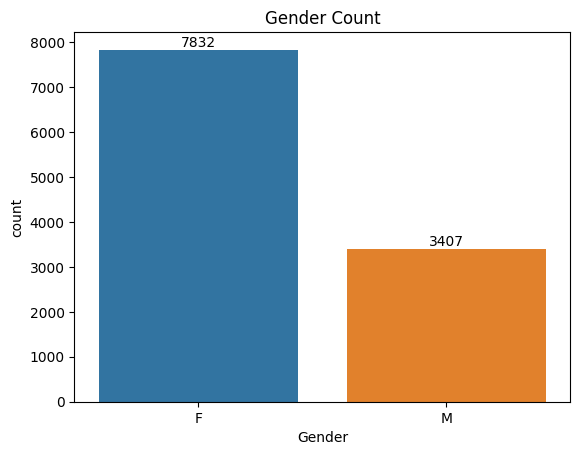

In [18]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Gender Count")
plt.show()

### Amount spent by gender

In [19]:
gender_amount = df.groupby('Gender')['Amount'].sum().reset_index()
gender_amount

,Gender,Amount
0,F,74335853
1,M,31913276


<function matplotlib.pyplot.show(close=None, block=None)>

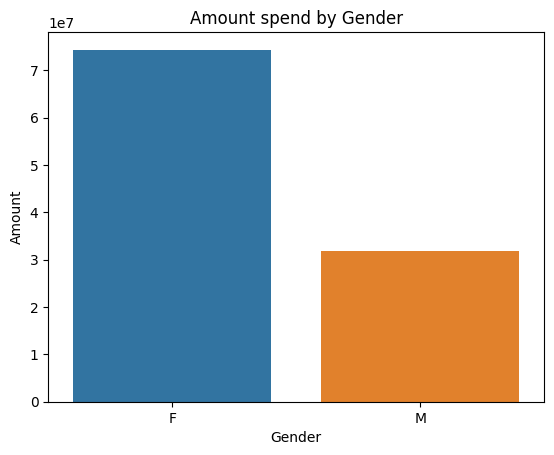

In [20]:
ax = sns.barplot(x = 'Gender', y = 'Amount', data = gender_amount)
plt.title('Amount spend by Gender')
plt.show

#### From the above data and graph we conclude that most of the buyers are female and amount spent by female is also higher than male

### Age

In [21]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


In [22]:
agegroup_count = df['Age Group'].value_counts()
agegroup_count

26-35    4541
36-45    2283
18-25    1879
46-50     983
51-55     830
55+       427
0-17      296
Name: Age Group, dtype: int64

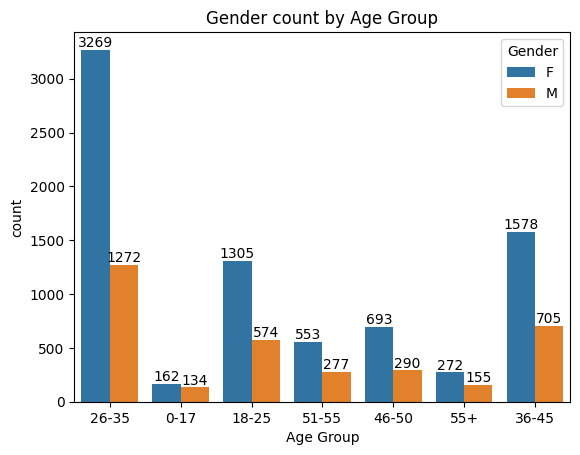

In [23]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Gender count by Age Group')
plt.show()

In [24]:
agegroup_sales = df.groupby('Age Group')['Amount'].sum().reset_index()
agegroup_sales

,Age Group,Amount
0,0-17,2699653
1,18-25,17240732
2,26-35,42613442
3,36-45,22144994
4,46-50,9207844
5,51-55,8261477
6,55+,4080987


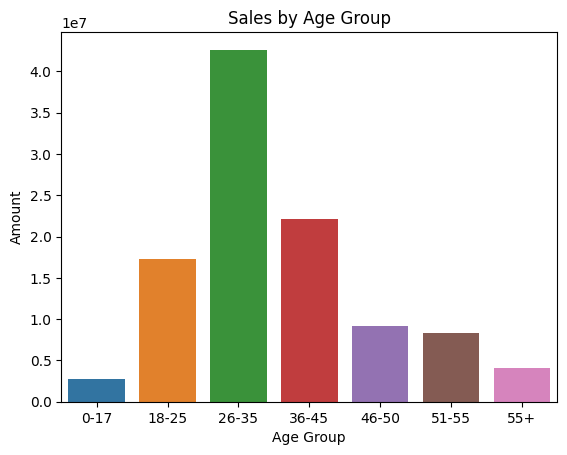

In [25]:
sns.barplot(x = 'Age Group', y = 'Amount', data = agegroup_sales)
plt.title('Sales by Age Group')
plt.show()

#### From the above graphs we conclude that age group 26-35 yrs female gives us the highest sale followed by 36-45 and 18-25

### State

In [26]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


In [27]:
state_sale = df.groupby('State')['Amount'].sum().reset_index().sort_values('Amount', ascending = False)
state_sale

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


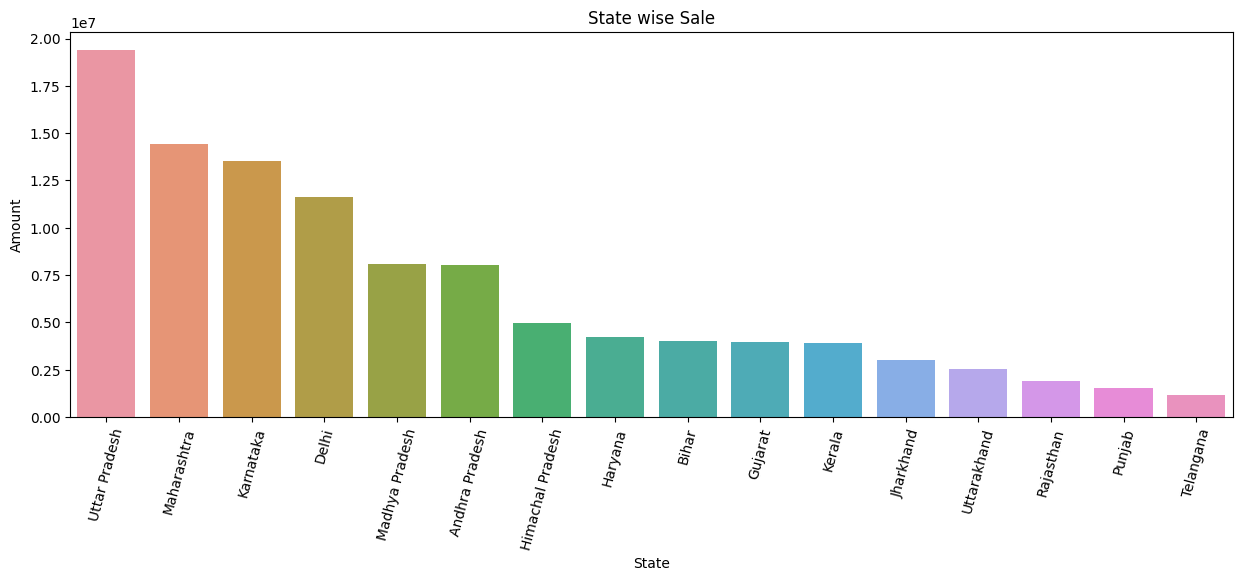

In [28]:
plt.figure(figsize = (15,5))
ax = sns.barplot(x = 'State', y = 'Amount', data = state_sale)
plt.title('State wise Sale')
plt.xticks(rotation = 75)
plt.show()

In [29]:
state_order = df.groupby('State')['Orders'].sum().reset_index().sort_values('Orders', ascending = False)
state_order

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


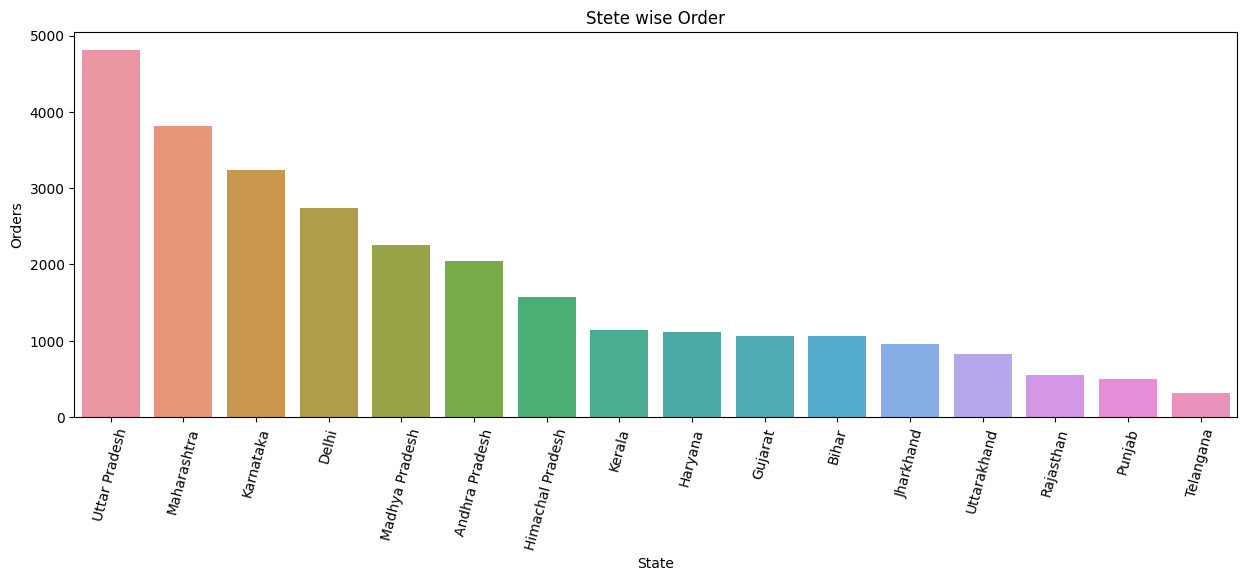

In [30]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'State', y = 'Orders', data = state_order)
plt.title('Stete wise Order')
plt.xticks(rotation = 75)
plt.show()

#### From the above graph we conclude that highest orders generating state is Uttar Pradesh followed by Maharashtra and Karnataka which also gives the highest sale

### Marital Status

In [31]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


In [32]:
shadi = df['Marital_Status'].value_counts().reset_index()

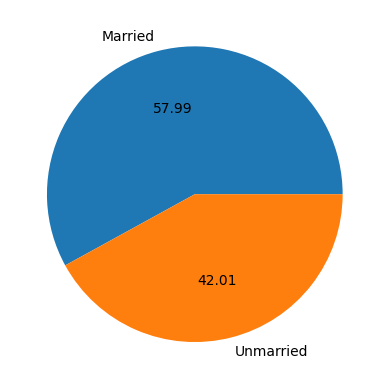

In [33]:
plt.pie(x = 'Marital_Status', data = shadi, autopct = '%0.2f', labels = ['Married', 'Unmarried'])
plt.show()

In [34]:
sales_mg = df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().reset_index()
sales_mg

,Marital_Status,Gender,Amount
0,0,F,43786646
1,0,M,18338738
2,1,F,30549207
3,1,M,13574538


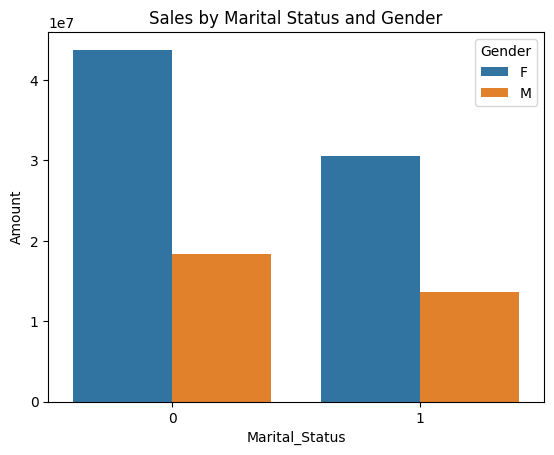

In [35]:
sns.barplot(x = 'Marital_Status', y = 'Amount', data = sales_mg, hue = 'Gender')
plt.title('Sales by Marital Status and Gender')
plt.show()

#### From the above graph we found that most of the buyers are married (women) and they have high purchasing power

### Occupation

In [36]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


In [37]:
df['Occupation'].unique()

array(['Healthcare', 'Govt', 'Automobile', 'Construction',
       'Food Processing', 'Lawyer', 'Media', 'Banking', 'Retail',
       'IT Sector', 'Aviation', 'Hospitality', 'Agriculture', 'Textile',
       'Chemical'], dtype=object)

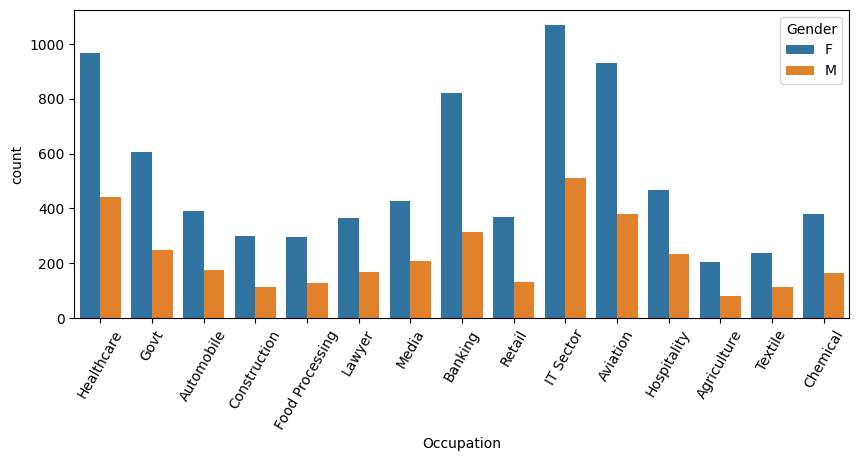

In [38]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'Occupation', data = df, hue = 'Gender')
plt.xticks(rotation = 60)
plt.show()

In [39]:
sales_occupation = df.groupby('Occupation')['Amount'].sum().reset_index().sort_values(by = 'Amount', ascending = False)
sales_occupation

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


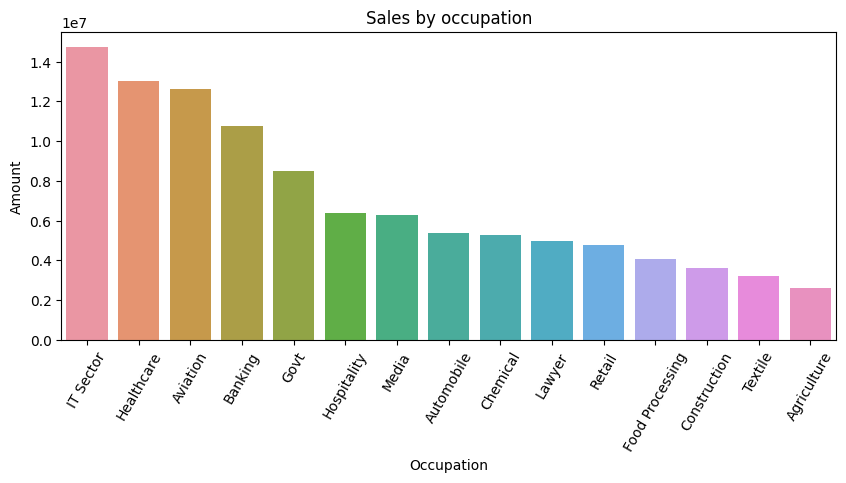

In [40]:
plt.figure(figsize = (10,4))
sns.barplot(x = 'Occupation', y = 'Amount', data = sales_occupation)
plt.title('Sales by occupation')
plt.xticks(rotation = 60)
plt.show()


#### From the above graph we conclude that most of the sales revenue is generated by IT Sector follwed by Healthcare and Aviation sector

### Product Category

In [41]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


In [42]:
df.Product_Category.unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

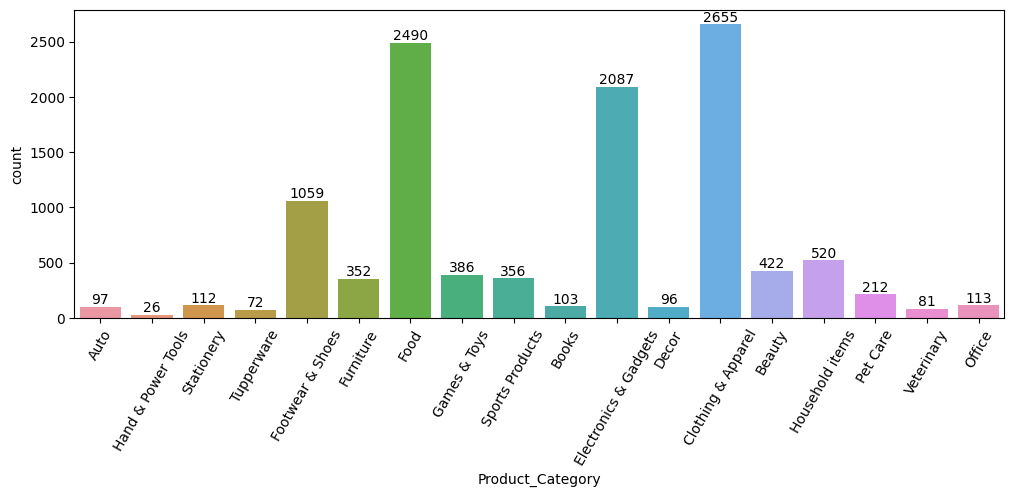

In [43]:
plt.figure(figsize = (12,4))
ax = sns.countplot(x = 'Product_Category', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation = 60)    
plt.show()

#### Above graph shows that most orders are from Clothing & Apparel followd by Food and then Electronics & Gadgets

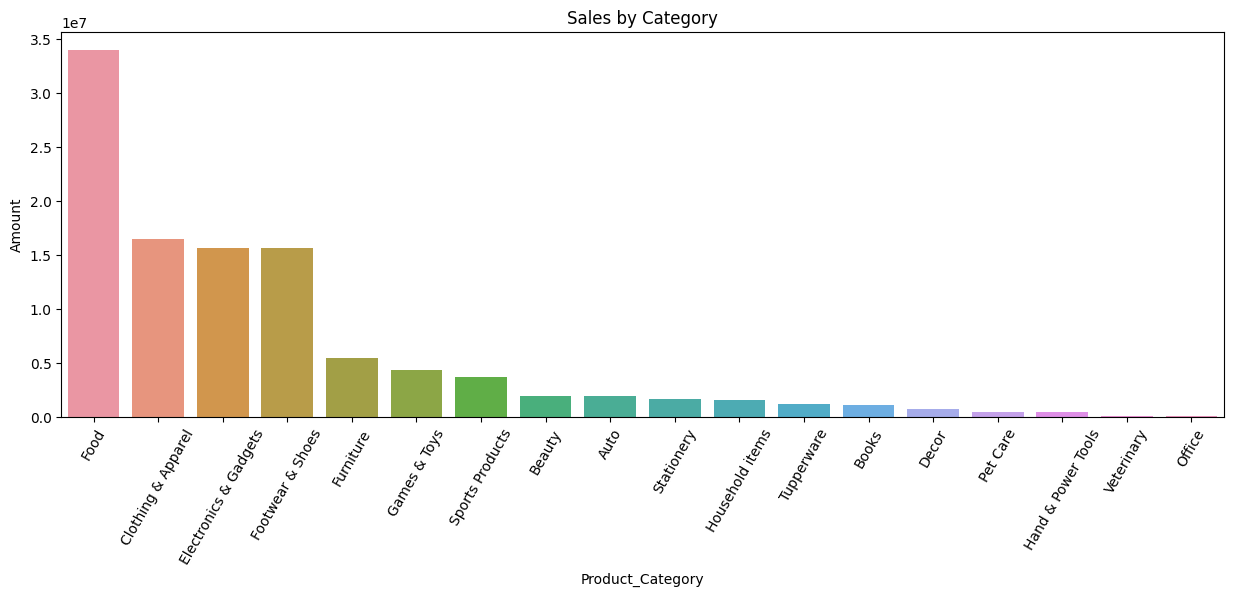

In [44]:
sales_category = df.groupby('Product_Category')['Amount'].sum().reset_index().sort_values('Amount', ascending = False)
plt.figure(figsize = (15,5))
sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_category)
plt.title('Sales by Category')
plt.xticks(rotation = 60)
plt.show()

#### This graph states that most sales are from Food followed by Clothing & Apparel, Electronics & Gadgets

### Top 10 most ordered products

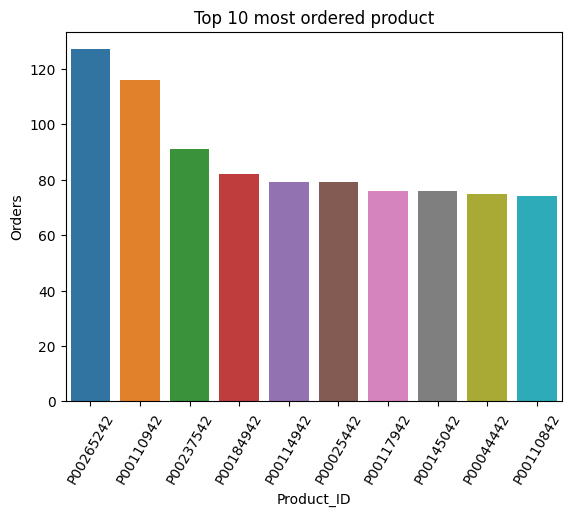

In [45]:
top10_order = df.groupby('Product_ID')['Orders'].sum().reset_index().sort_values('Orders', ascending = False).head(10)
top10_order

sns.barplot(x = 'Product_ID', y = 'Orders', data = top10_order)
plt.title('Top 10 most ordered product')
plt.xticks(rotation = 60)
plt.show()

## Results

* The majority of sales were made by married females, with the highest sales in the age group of 26-35 years old.
* The top-selling product categories were Food, Clothing & Apparel and Electronics & Gadgets while the top ordered products were P00265242, P00110942 and P00237542.
* The state with the highest sale was Uttar Pradesh, Maharashtra and Karnataka and the occupation with the highest sales come from IT Sector, Healthcare and Aviation sector.
